In [1]:
# Import Dependencies
import pandas as pd
from pathlib import Path
from matplotlib import pyplot as plt

In [2]:
# Load sleep_data set into pandas
sleep_data = pd.read_csv("resources/Sleep_health_and_lifestyle_dataset.csv")
sleep_data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [3]:
# No Null Values
# Identify types
sleep_data.dtypes

Person ID                    int64
Gender                      object
Age                          int64
Occupation                  object
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                object
Blood Pressure              object
Heart Rate                   int64
Daily Steps                  int64
Sleep Disorder              object
dtype: object

In [4]:
# Identify unique values

In [5]:
# Sleep - Physical Activity


In [6]:
# Does the need for sleep increase with age? (Stress)(Sleep duraation)(Sleep Quality)

In [7]:
# Create bins
bins = [20, 29, 39, 49, 59]
age_labels = ["20s", "30s", "40s", "50s"]

In [8]:
# Slice the data and place it into bins
# Place the data series into a new column inside of the DataFrame
sleep_data["Age Range"] = pd.cut(sleep_data["Age"], bins, labels=age_labels)
sleep_data

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Age Range
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None,20s
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None,20s
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None,20s
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,20s
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,20s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,50s
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,50s
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,50s
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,50s


In [9]:
#calculate the mean of stress level by age group
age_stress = sleep_data.groupby(["Age Range"])["Stress Level"].mean()
age_stress

Age Range
20s    7.315789
30s    5.521127
40s    5.675214
50s    4.447917
Name: Stress Level, dtype: float64

In [10]:
#calculate the mean of sleep duration by age group
age_sleep_duration = sleep_data.groupby(["Age Range"])["Sleep Duration"].mean()
age_sleep_duration

Age Range
20s    6.468421
30s    7.066901
40s    6.909402
50s    7.631250
Name: Sleep Duration, dtype: float64

In [11]:
age_sleep_quality = sleep_data.groupby(["Age Range"])["Quality of Sleep"].mean()
age_sleep_quality

Age Range
20s    5.789474
30s    7.225352
40s    6.965812
50s    8.166667
Name: Quality of Sleep, dtype: float64

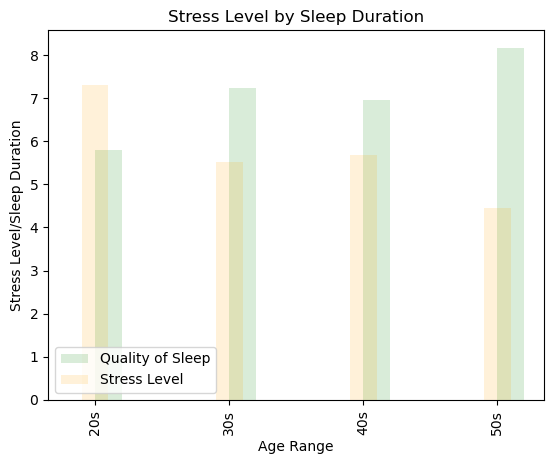

In [12]:
# Create bar chart for age_stress
age_sleep_quality.plot(kind='bar', color="green", alpha=0.15, legend="Quality of Sleep", align="edge", width=0.2)
age_stress.plot(kind='bar', color="orange", alpha=0.15, legend="Stress Level", align="center", width=0.2)

# Create the ticks/titles/labels for our bar chart's x axis
plt.title("Stress Level by Sleep Duration")
plt.xlabel("Age Range")
plt.ylabel("Stress Level/Sleep Duration")
plt.legend(loc=3)
plt.savefig("images/age_duration_bar.png")
plt.show()

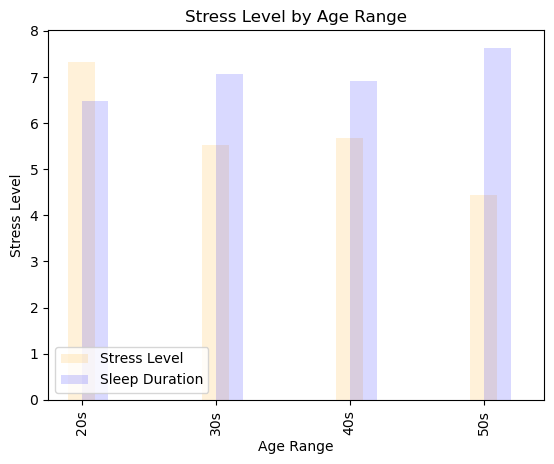

In [13]:
# Create bar chart for age_stress
age_stress.plot(kind='bar', color="orange", alpha=0.15, legend="Stress Level", align="center", width=0.2)
age_sleep_duration.plot(kind='bar', color="blue", alpha=0.15, legend="Sleep Duration", align="edge",  width=0.2)

# Create the ticks/titles/labels for our bar chart's x axis
plt.title("Stress Level by Age Range")
plt.xlabel("Age Range")
plt.ylabel("Stress Level")
plt.legend(loc=3)
plt.savefig("images/age_quality_bar.png")
plt.show()

In [14]:
# Create dfs for age ranges
twenties_df = sleep_data[sleep_data["Age Range"] == "20s"]
thirties_df = sleep_data[sleep_data["Age Range"] == "30s"]
forties_df = sleep_data[sleep_data["Age Range"] == "40s"]
fifties_df = sleep_data[sleep_data["Age Range"] == "50s"]

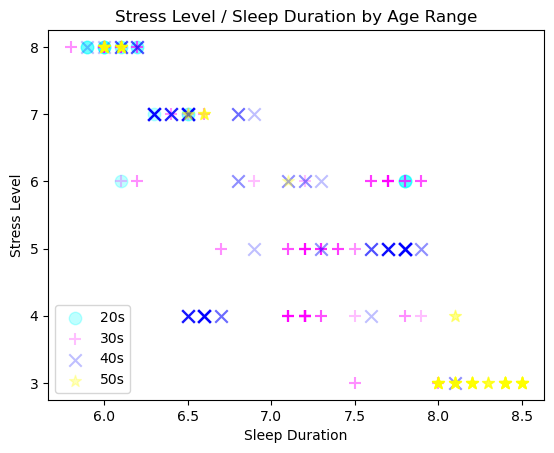

In [15]:
# Create scatter plot for stress x duration
# plot the sleep duration to stress level relationship for people in their 20s
x = twenties_df["Sleep Duration"]
y = twenties_df["Stress Level"]
plt.scatter(x, y, color="cyan", marker="o", s=80, alpha=0.25, label = "20s")

# plot the sleep duration to stress level relationship for people in their 30s
x = thirties_df["Sleep Duration"]
y = thirties_df["Stress Level"]
plt.scatter(x, y,color="magenta", marker="+", s=80, alpha=0.25, label = "30s")

# plot the sleep duration to stress level relationship for people in their 40s
x = forties_df["Sleep Duration"]
y = forties_df["Stress Level"]
plt.scatter(x, y, color="blue", marker="x", s=80, alpha=0.25, label = "40s")

# plot the sleep duration to stress level relationship for people in their 50s
x = fifties_df["Sleep Duration"]
y = fifties_df["Stress Level"]
plt.scatter(x, y, color="yellow", marker="*", s=80, alpha=0.25, label = "50s")


# Create the ticks/titles/labels for our bar chart's x axis
plt.title("Stress Level / Sleep Duration by Age Range")
plt.xlabel("Sleep Duration")
plt.ylabel("Stress Level")
plt.legend(loc=3)
plt.savefig("images/sleep_duration_scatter.png")
plt.show()

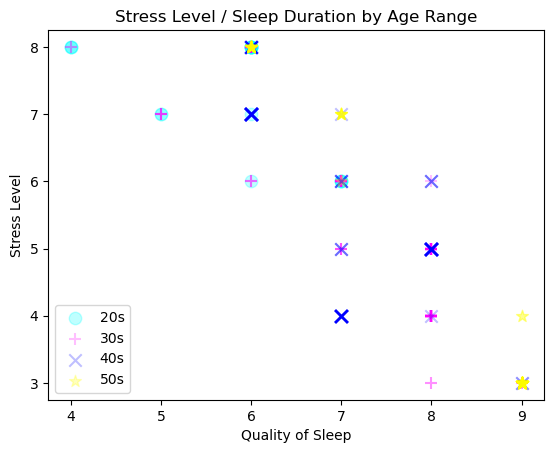

In [16]:
# Create scatter plot for stress x quality
# plot the sleep quality to stress level relationship for people in their 20s
x = twenties_df["Quality of Sleep"]
y = twenties_df["Stress Level"]
plt.scatter(x, y, color="cyan", marker="o", s=80, alpha=0.25, label = "20s")

# plot the sleep quality to stress level relationship for people in their 30s
x = thirties_df["Quality of Sleep"]
y = thirties_df["Stress Level"]
plt.scatter(x, y,color="magenta", marker="+", s=80, alpha=0.25, label = "30s")

# plot the sleep quality to stress level relationship for people in their 40s
x = forties_df["Quality of Sleep"]
y = forties_df["Stress Level"]
plt.scatter(x, y, color="blue", marker="x", s=80, alpha=0.25, label = "40s")

# plot the sleep quality to stress level relationship for people in their 50s
x = fifties_df["Quality of Sleep"]
y = fifties_df["Stress Level"]
plt.scatter(x, y, color="yellow", marker="*", s=80, alpha=0.25, label = "50s")


# Create the ticks/titles/labels for our bar chart's x axis
plt.title("Stress Level / Sleep Duration by Age Range")
plt.xlabel("Quality of Sleep")
plt.ylabel("Stress Level")
plt.legend(loc=3)
plt.savefig("images/sleep_quality_scatter.png")
plt.show()

In [17]:
# On average are males or females getting better sleep? (lydia)
# How does gender correlate with occupation and average length of sleep?
# Group occupations
occupation_data = sleep_data.groupby(["Occupation"])["Sleep Duration"].mean()
occupation_data
# Generate graph 1
# Generate graph 2

Occupation
Accountant              7.113514
Doctor                  6.970423
Engineer                7.987302
Lawyer                  7.410638
Manager                 6.900000
Nurse                   7.063014
Sales Representative    5.900000
Salesperson             6.403125
Scientist               6.000000
Software Engineer       6.750000
Teacher                 6.690000
Name: Sleep Duration, dtype: float64

In [18]:
# Occupation - BMI
# Run unique values
# replace normal weight with average
# drop "other" values